# Analyze image stack of turbulent box

In [1]:
import imageio

import matplotlib.pyplot as plt

import astro3d
from astro3d import image_stack

## Read the image stack

We again need to set the printer-specific settings and the directory of the slides:

In [2]:
stack = image_stack.IStack(
    astro3d.get_output('slices_turbulent_box'),
    dpi_x=600, dpi_y=300, dz=27e-4,
)

## Print out statistics

getting colors from 1 sample images ... 

Done!


(<Figure size 200x100 with 1 Axes>, <Axes:>)

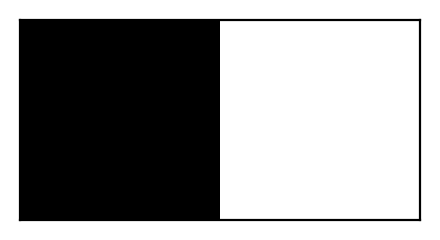

In [3]:
stack._get_colors(N=1)
stack.show_colors()

Now we assign the transparent color index

In [4]:
stack.empty_indices = [1]

In [5]:
stack.show_info()

There are 2 colors in this image:
- [0, 0, 0]
- [255, 255, 255] (transp.)
185 files
dimension = 5.00 x 5.00 x 0.50 cm


computing counts:   0%|          | 0/185 [00:00<?, ?it/s]

filling fraction: 1.98%
nr of fully transparent columns: 0.35%
most opaque pixel has 97 filled pixels (=52.43% of all layers are filled)
mean counts in non-transparent columns: 10, 1.8e+02


## Plots

Show the distribution of materials

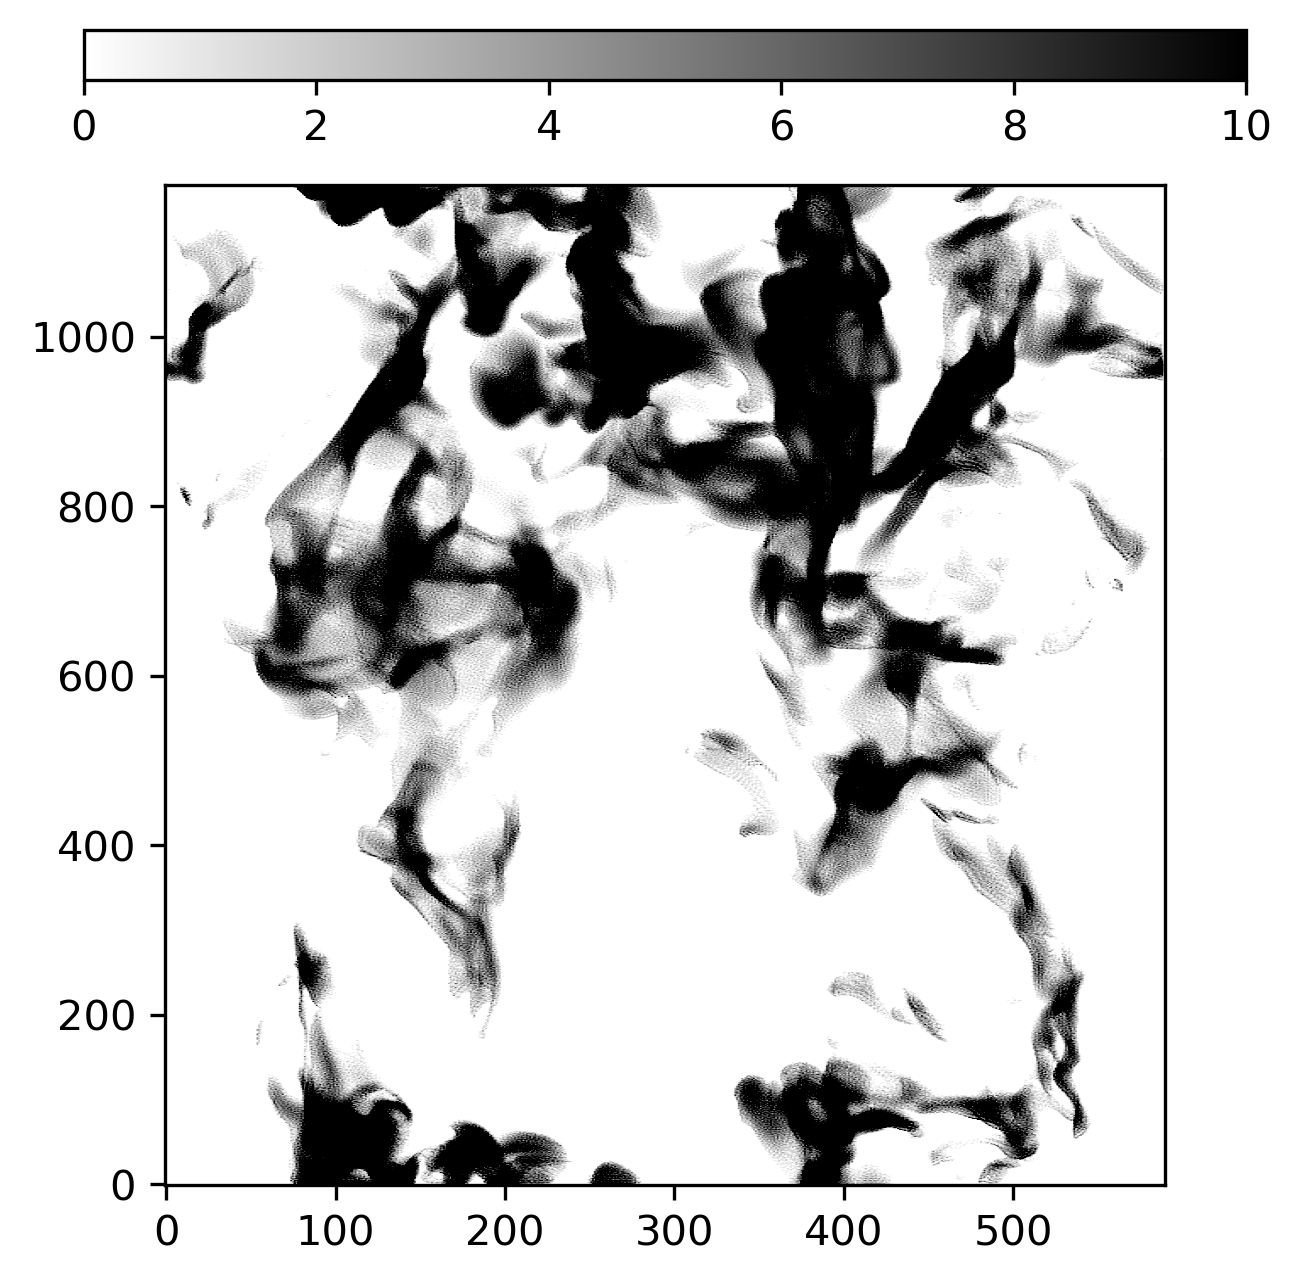

In [6]:
f, ax = stack.show_counts()

Show a histogram of the columns that are not fully transparent

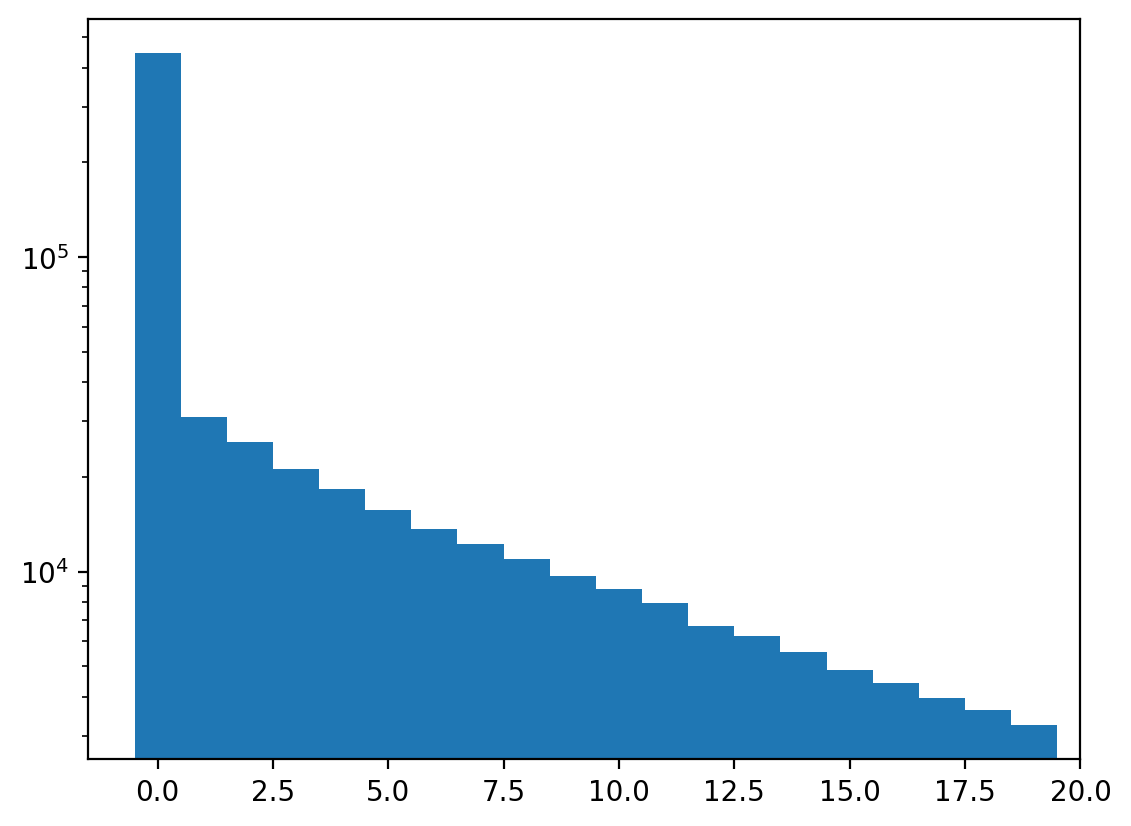

In [7]:
f, ax = stack.show_histogram()

Show fully transparent pixels and the density distribution.

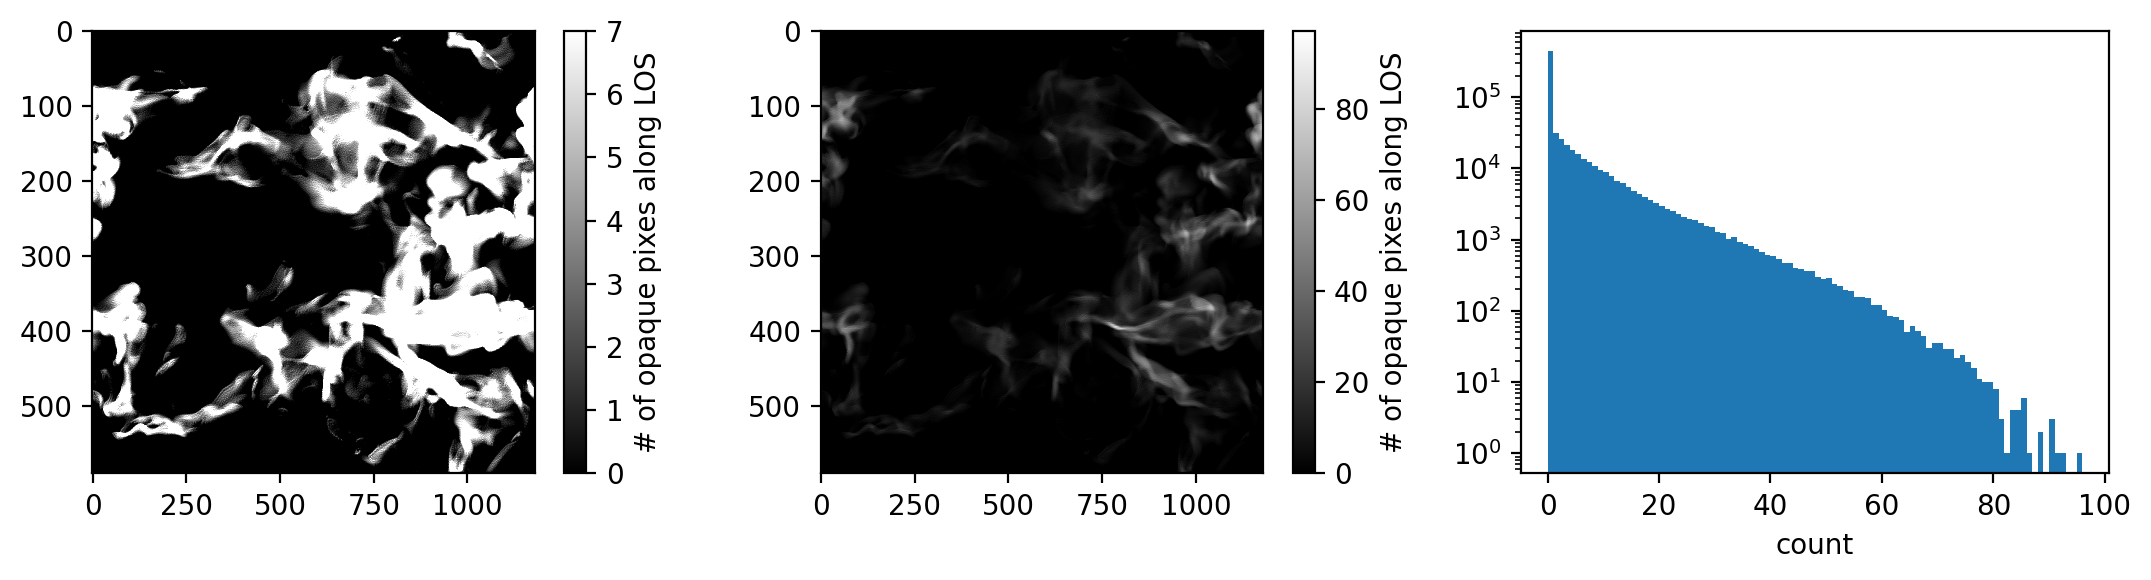

In [8]:
f, ax = stack.show_transparency_estimate()

Top view

In [9]:
img = stack.get_top_view(bg=[255, 255, 255]);

### Compare data to 3d-printed result

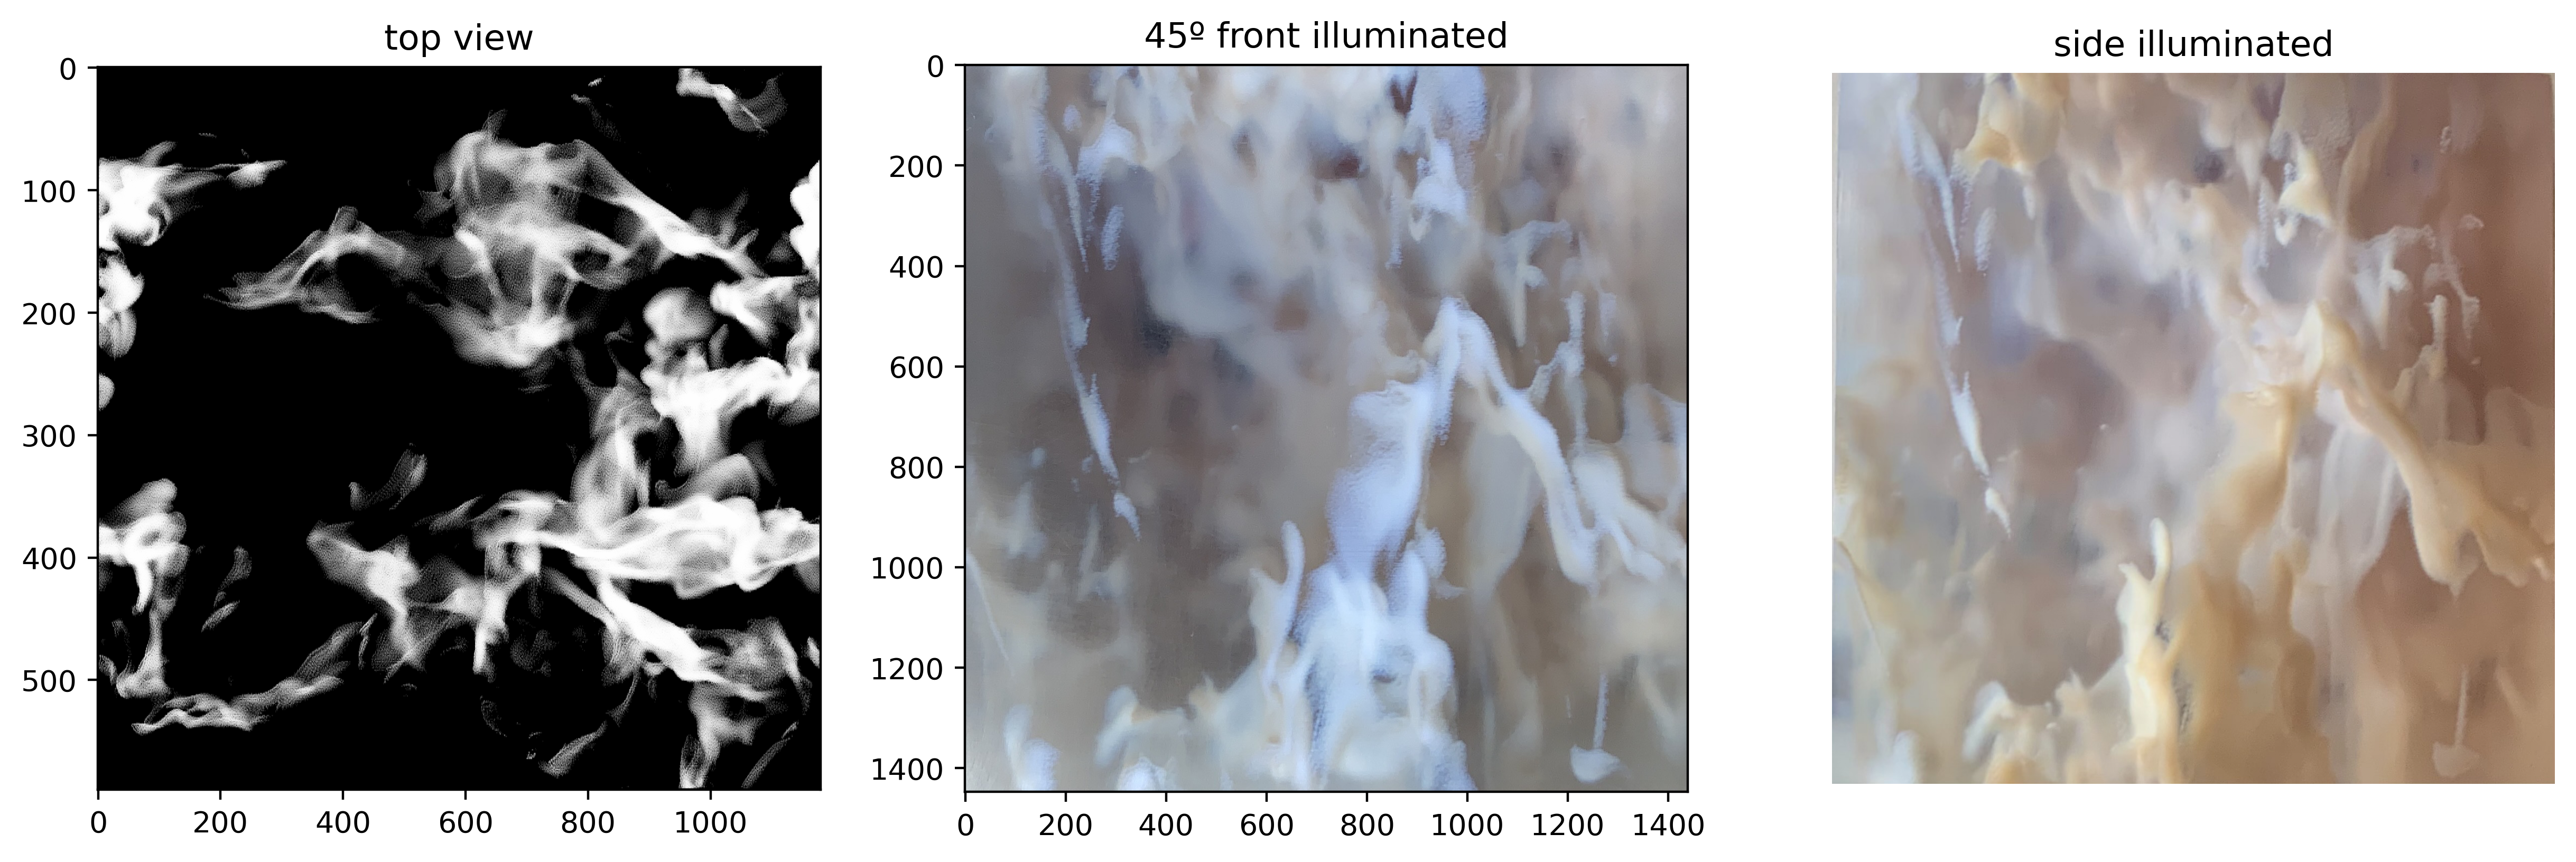

In [10]:
f, axs = plt.subplots(1, 3, dpi=200, figsize=(15,5))
axs[0].imshow((255 - img.transpose(1, 0, 2)) / 255.)
axs[0].set_aspect(stack.dpi_x / stack.dpi_y)
axs[0].set_title(f'top view')

axs[1].imshow(imageio.v2.imread('results/img1.jpg'))
axs[1].set_title('45º front illuminated')
axs[2].axis('off')

axs[2].imshow(imageio.v2.imread('results/img2.jpg'))
axs[2].set_title('side illuminated')
axs[2].axis('off');

In [11]:
from IPython.display import Video
Video('results/turbulent_box.mp4', width=500, html_attributes='autoplay loop')